In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 1. Loading Data

In [25]:
data_sets = ["./Data/" +  f for f in os.listdir("./Data") if f.endswith(".csv")]

In [26]:
data = pd.concat(map(pd.read_csv, data_sets))

In [27]:
data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z12rwfnyyrbsefonb232i5ehdxzkjzjs2,Lisa Wellas,NaN,+447935454150 lovely girl talk to me xxx﻿,1
1,z130wpnwwnyuetxcn23xf5k5ynmkdpjrj04,jason graham,2015-05-29T02:26:10.652000,I always end up coming back to this song<br />﻿,0
2,z13vsfqirtavjvu0t22ezrgzyorwxhpf3,Ajkal Khan,NaN,"my sister just received over 6,500 new <a rel=...",1
3,z12wjzc4eprnvja4304cgbbizuved35wxcs,Dakota Taylor,2015-05-29T02:13:07.810000,Cool﻿,0
4,z13xjfr42z3uxdz2223gx5rrzs3dt5hna,Jihad Naser,NaN,Hello I&#39;am from Palastine﻿,1


## 2. EDA

I am currious about the lengths of the comments, so I am going to do a little data exploration.

In [28]:
df = data.copy()
df["CONTENT_LEN"] = df.CONTENT.map(len)

In [29]:
df.corr().CONTENT_LEN

CLASS          0.34191
CONTENT_LEN    1.00000
Name: CONTENT_LEN, dtype: float64

In [40]:
labels = list(df.CLASS.unique())
labels

[1, 0]

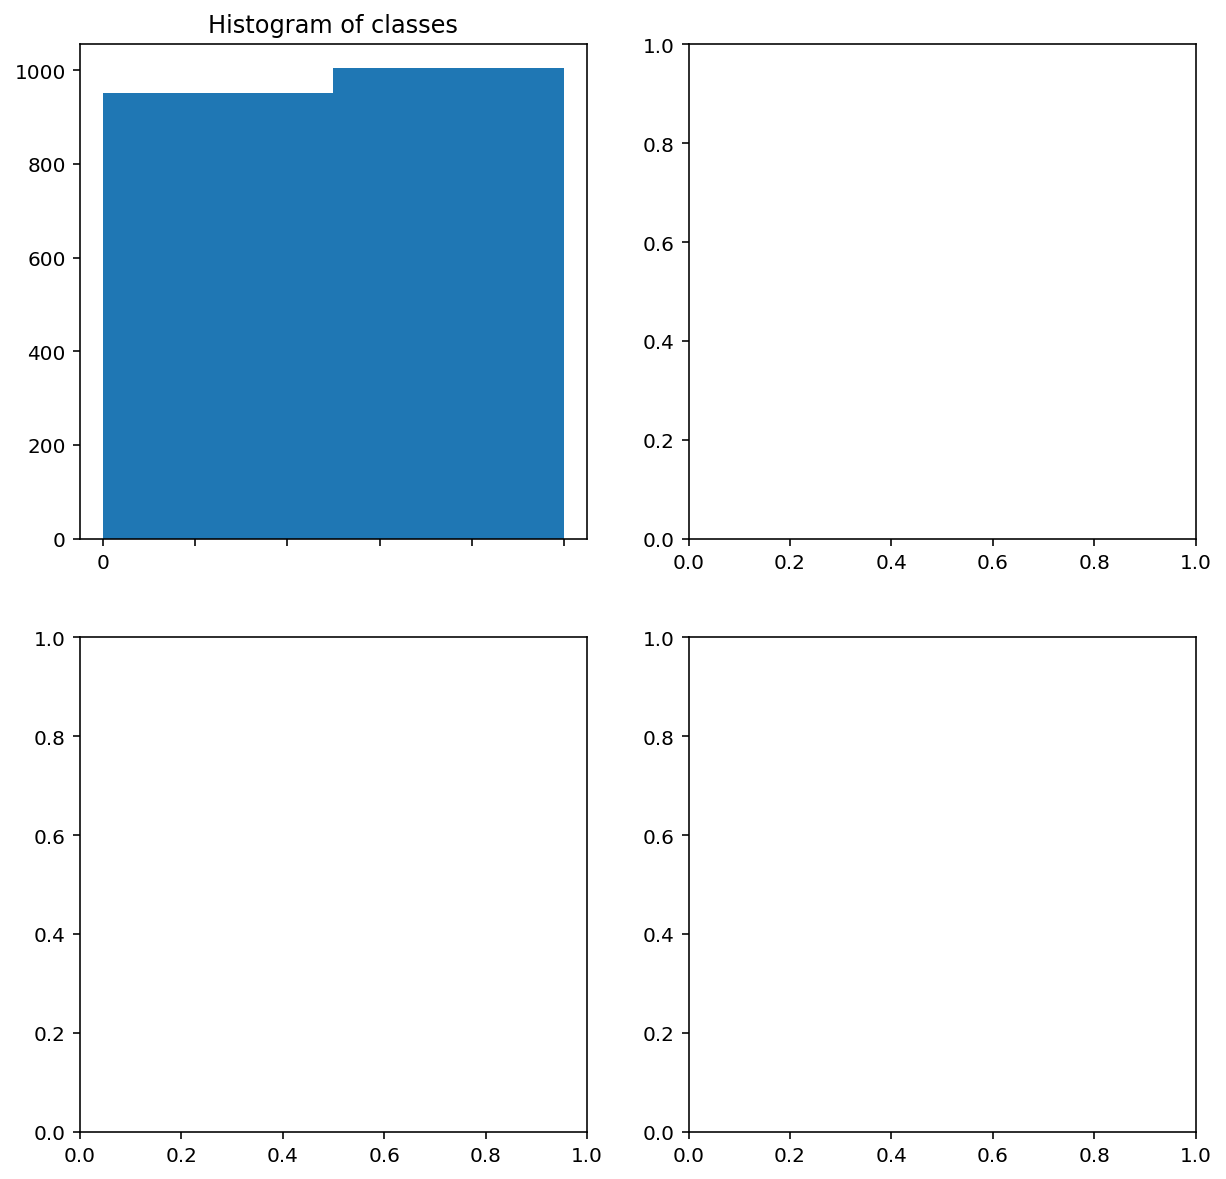

In [42]:
figure, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ax[0,0].set_title("Histogram of classes");
labels = list(df.CLASS.unique());
ax[0,0].set_xticklabels(labels);
ax[0,0].hist(df.CLASS, bins=2);


#ax[0,0].set_title("Correlation heatmap of content length with target");
#sns.heatmap(df.corr()[['CLASS']].sort_values("CLASS"), annot=True, cmap='coolwarm', ax = ax[0,0]);

# ax[0,1].set_title("Line Plots of columns");
# df.plot(lw = 1, ax = ax[0,1]);
# ax[0,1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# ax[1,0].set_title("Kernel Density Estimation of target");
# df["target"].plot.kde(ax = ax[1,0],);

# ax[1,1].set_title("Missing Values");
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis', ax = ax[1,1]);